This is the analysis for thre when we have and dead layer and without dead layer. for 190 Million events

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit


Thresholds = 0, 10, 50

## path to root file

In [ ]:
#ucnaP_dead_path   = "/home/rhythm/Research/ml/research/2024/jul/new/data/dead_layer_histogram_all.root" #UCNA
#ucnaP_nodead_path = "/home/rhythm/Research/ml/research/2024/jul/new/data/nodead_layer_histogram_all.root" #UCNA


In [ ]:
ucnaP_dead_path   = "/home/rhythm/Research/ml/research/2024/jul/new/data/dead_layer_histogram_all.root" #UCNA
ucnaP_nodead_path = "/home/rhythm/Research/ml/research/2024/jul/new/data/nodead_layer_histogram_all.root" #UCNA


In [ ]:
ucnaP_dead   =uproot.open(ucnaP_dead_path)  
ucnaP_nodead =uproot.open(ucnaP_nodead_path)

In [ ]:
ucnaP_dead.keys()

In [ ]:
variables = ['KE;1', 'eTrue1;1', 'eTrue2;1','EdepType01;1', 'EdepType02;1', 'EdepType11;1', 'EdepType12;1', 'EdepType0;1', 'EdepType1;1', 'misEdepType01;1', 'misEdepType02;1', 'misEdepType11;1', 'misEdepType12;1', 'direct01;1', 'direct02;1', 'direct11;1', 'direct12;1',]

In [ ]:
angular_variables = [ 'pzE;1','pzKE0;1','pz11;1','pz12;1','pz01;1','pz02;1','pzForward;1','pzBackward;1']

In [ ]:
ucnaPlus_cases = {
    'dead' : ucnaP_dead_path,
    'withoutdead' : ucnaP_nodead_path
}

In [ ]:
ucnaP_df = {}
for file_num, file_path in ucnaPlus_cases.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in variables:
            # Access the specific branch using the key
            branch = file[key]
            

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['KE;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaP_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


In [ ]:
dead = ucnaP_df['dead']
no_dead = ucnaP_df['withoutdead']

In [ ]:
dead.head()

In [ ]:
plt.figure(figsize=(10,8))
plt.step(dead['Evals'], y = no_dead['KE;1']/190000000, c='green', label = 'no dead layer')
plt.step(dead['Evals'],y = dead['KE;1']/190000000, c  = 'red',label = 'with dead layer')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
plt.ylim(0.0,0.06)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title("Histogram distribution of true KE of electron ", fontsize = 16)
#plt.savefig(f'./mar/costhChanged/cosTh.png')

In [ ]:
plt.figure(figsize=(10,8))
plt.step(dead['Evals'], y = no_dead['EdepType1;1']/190000000, c='green', label = 'no dead layer')
plt.step(dead['Evals'], y = dead['EdepType1;1']/190000000, c  = 'red',label = 'with dead layer')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
plt.ylim(0.0,0.001)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title("Histogram distribution of Backscattered events THR = 10 keV ", fontsize = 16)
plt.savefig(f'../visualisation/histogram_distribution_backscattered_events_10.png')

In [ ]:
plt.figure(figsize=(10,8))
plt.step(dead['Evals'], y = no_dead['misEdepType01;1']/190000000, c='green', label = 'no dead layer')
plt.step(dead['Evals'], y = dead['misEdepType01;1']/190000000, c  = 'red',label = 'with dead layer')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
plt.yscale('log')
plt.ylim(0.0,0.0015)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title("Histogram distribution of mis Backscattered events (detector 1) THR = 10 keV ", fontsize = 16)
plt.savefig(f'../visualisation/histogram_distribution_misbackscattered_events_detector1_10.png')

In [ ]:
plt.figure(figsize=(10,8))
plt.step(dead['Evals'], y = no_dead['misEdepType02;1']/190000000, c='green', label = 'no dead layer')
plt.step(dead['Evals'], y = dead['misEdepType02;1']  /190000000, c  = 'red',label = 'with dead layer')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
plt.yscale('log')
plt.ylim(0.0,0.0015)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title("Histogram distribution of mis Backscattered events (detector 2) THR = 10 keV ", fontsize = 16)
plt.savefig(f'../visualisation/histogram_distribution_misbackscattered_events_detector2_10.png')

In [ ]:
def beta(KE):
    m_e = 511
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta


def asymmetry_measured(N1, N2):
    a  = (N1-N2) / (N1+N2)
    return a

def backscattering_corrections(A_old, A_corrected):
    delta = (A_corrected - A_old) / A_old
    return delta

def error_backscattering_correction(A_new, A_old,err_A_new ,err_A_old):
    delcorr_delAnew = (1/A_old)*err_A_new
    delcorr_delAold = (A_new/(A_old)**2 )*err_A_old
    delcorr = np.sqrt(delcorr_delAnew**2 +delcorr_delAold**2 )
    return delcorr    

def error_asymmetry_beta(N1, N2, mid_beta):
    nTot = N1 + N2
    errA = ((2 * np.sqrt(N1 * N2)) / (nTot ** (3 / 2))) * (1 / (0.5 * mid_beta))
    return errA    

def error_weight(N_initial, N_type0):
    weight = N_type0/N_initial
    err_N_type0 = np.sqrt(N_type0)
    err_N_initial = np.sqrt(N_initial)
    err_weight = weight*((err_N_type0/N_initial) + (weight*(err_N_initial/N_initial)))
    return err_weight

def error_corrected_weighted_asymmetry(err_weight, err_asymmetry, N_initial, N_type0, asymmetry):
    weight = N_type0/N_initial
    err = asymmetry*((err_weight*asymmetry) + (err_asymmetry*weight))        
    return err 

In [ ]:
binwidth = 25

In [ ]:
dead['Emid'] = dead['Evals']   + binwidth/2
no_dead['Emid'] = no_dead['Evals'] + binwidth/2


In [ ]:
dead.head()


# without beta correction

## thrown


In [ ]:

dead['raw_asymmetry_thrown']    = asymmetry_measured(dead['eTrue1;1'],    dead['eTrue2;1'])
no_dead['raw_asymmetry_thrown'] = asymmetry_measured(no_dead['eTrue1;1'], no_dead['eTrue2;1'])


## type 0


In [ ]:
dead['raw_asymmetry_type0']    = asymmetry_measured(dead['EdepType01;1'],    dead['EdepType02;1'])
no_dead['raw_asymmetry_type0'] = asymmetry_measured(no_dead['EdepType01;1'], no_dead['EdepType02;1'])


## type 1

In [ ]:
dead['raw_asymmetry_type1']    = asymmetry_measured(dead['EdepType11;1'],    dead['EdepType12;1'])
no_dead['raw_asymmetry_type1'] = asymmetry_measured(no_dead['EdepType11;1'], no_dead['EdepType12;1'])


# with beta correction

## thrown

In [ ]:
dead['asymmetry_thrown_beta']   = asymmetry_measured(dead['eTrue1;1'],        dead['eTrue2;1'])/(beta(dead['Emid'])/2)
no_dead['asymmetry_thrown_beta']= asymmetry_measured(no_dead['eTrue1;1'], no_dead['eTrue2;1'])/(beta(dead['Emid'])/2)
dead['err_asymmetry_thrown_beta']   = error_asymmetry_beta(dead['eTrue1;1'],        dead['eTrue2;1'], beta(dead['Emid']))
no_dead['err_asymmetry_thrown_beta']= error_asymmetry_beta(no_dead['eTrue1;1'], no_dead['eTrue2;1'],  beta(dead['Emid']))


## type 0 

In [ ]:
dead['asymmetry_type0_beta']    = asymmetry_measured(dead['EdepType01;1'],    dead['EdepType02;1'])/(beta(dead['Emid'])/2)
no_dead['asymmetry_type0_beta'] = asymmetry_measured(no_dead['EdepType01;1'], no_dead['EdepType02;1'])/(beta(dead['Emid'])/2)
dead['err_asymmetry_type0_beta']     = error_asymmetry_beta(dead['EdepType01;1'],    dead['EdepType02;1'] , beta(dead['Emid']))
no_dead['err_asymmetry_type0_beta']  = error_asymmetry_beta(no_dead['EdepType01;1'], no_dead['EdepType02;1'], beta(no_dead['Emid']))



## type 1

In [ ]:
dead['asymmetry_type1_beta']    = asymmetry_measured(dead['EdepType11;1'],    dead['EdepType12;1'])/(beta(dead['Emid'])/2)
no_dead['asymmetry_type1_beta'] = asymmetry_measured(no_dead['EdepType11;1'], no_dead['EdepType12;1'])/(beta(dead['Emid'])/2)
dead['err_asymmetry_type1_beta'] = error_asymmetry_beta(dead['EdepType11;1'],    dead['EdepType12;1'] , beta(dead['Emid']))
no_dead['err_asymmetry_type1_beta']  = error_asymmetry_beta(no_dead['EdepType11;1'], no_dead['EdepType12;1'], beta(no_dead['Emid']))



In [ ]:
dead.columns

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(dead['Evals'], y = no_dead['raw_asymmetry_type0'], c='green', label = 'no dead layer')
plt.scatter(dead['Evals'], y = dead['raw_asymmetry_type0'], c  = 'red',label = 'with dead layer')

#plt.scatter(dead['Evals'], y = no_dead['raw_asymmetry_thrown'], c='blue', label = 'no dead layer')
#plt.scatter(dead['Evals'], y = dead['raw_asymmetry_thrown'], c  = 'pink',label = 'with dead layer')

plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
#plt.yscale('log')
plt.ylim(-0.06,-0.005)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
#plt.ylabel(r'$A_{sim}  = \frac{\Gamma_{cos \theta > 0} - \Gamma_{cos \theta < 0}}{\Gamma_{cos \theta > 0}+\Gamma_{cos \theta < 0}}$', fontsize = 14)

plt.ylabel(r'$A_{meas, TYPE 0}  = \frac{N_1 - N_2}{N_1+N_2}$', fontsize = 14)
plt.title("A_meas TYPE 0 THR = 10 keV ", fontsize = 16)
plt.savefig(f'../visualisation/aMeasured_10.png')

In [ ]:
plt.figure(figsize=(10,8))
plt.errorbar(dead['Evals'], y = no_dead['asymmetry_type0_beta'],yerr = no_dead['err_asymmetry_type0_beta'] ,fmt='o', c='green', label = 'no dead layer')
plt.errorbar(dead['Evals'], y = dead['asymmetry_type0_beta'],   yerr = dead['err_asymmetry_type0_beta']    ,fmt='o', c  = 'red',label = 'with dead layer')

# Add shaded regions for error bars
plt.fill_between(dead['Evals'], 
                 no_dead['asymmetry_type0_beta'] - no_dead['err_asymmetry_type0_beta'], 
                 no_dead['asymmetry_type0_beta'] + no_dead['err_asymmetry_type0_beta'], 
                 color='green', alpha=0.2)
plt.fill_between(dead['Evals'], 
                 dead['asymmetry_type0_beta'] - dead['err_asymmetry_type0_beta'], 
                 dead['asymmetry_type0_beta'] + dead['err_asymmetry_type0_beta'], 
                 color='red', alpha=0.2)
#plt.axhline(y = -0.11749,c = 'black', label = r'$A_{input}$')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
#plt.yscale('log')
plt.ylim(-0.13,-0.11)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel(r'$A_{1, TYPE 0}  = \frac{N_1 - N_2}{N_1+N_2)*\frac{\beta}{2}}$', fontsize = 14)
plt.title(r"$A_1$ type 0  THR = 10 keV ", fontsize = 16)
plt.savefig(f'../visualisation/a1_type0_10.png')

# correct for backscattering

In [ ]:
dead['Gamma_1_corrected'] = dead['EdepType01;1'] -dead['misEdepType01;1'] + dead['misEdepType02;1']
dead['Gamma_2_corrected'] = dead['EdepType02;1'] -dead['misEdepType02;1'] + dead['misEdepType01;1']
          

In [ ]:
no_dead['Gamma_1_corrected'] = no_dead['EdepType01;1'] -no_dead['misEdepType01;1'] + no_dead['misEdepType02;1']
no_dead['Gamma_2_corrected'] = no_dead['EdepType02;1'] -no_dead['misEdepType02;1'] + no_dead['misEdepType01;1']
          

## corrected asymmetry

### type 0

In [ ]:
dead['corrected_asymmetry_type0_beta']    = asymmetry_measured(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)
no_dead['corrected_asymmetry_type0_beta'] = asymmetry_measured(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)


In [ ]:
dead['err_corrected_asymmetry_type0_beta']    = error_asymmetry_beta(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'], beta(dead['Emid']))
no_dead['err_corrected_asymmetry_type0_beta'] = error_asymmetry_beta(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'], beta(dead['Emid']))


### type 1

In [ ]:
#dead['corrected_asymmetry_type0_beta']    = asymmetry_measured(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)
#no_dead['corrected_asymmetry_type0_beta'] = asymmetry_measured(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)
#dead['err_corrected_asymmetry_type0_beta']    = error_asymmetry_beta(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'], beta(dead['Emid']))
#no_dead['err_corrected_asymmetry_type0_beta'] = error_asymmetry_beta(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'], beta(dead['Emid']))


In [ ]:
dead['fraction_type_0_individual_bin'] = dead['EdepType0;1']/dead['KE;1']
dead['fraction_type_0_corrected_individual_bin'] = (dead['Gamma_1_corrected'] + dead['Gamma_2_corrected'])/dead['KE;1']
no_dead['fraction_type_0_individual_bin'] = no_dead['EdepType0;1']/no_dead['KE;1']
no_dead['fraction_type_0_corrected_individual_bin'] = (no_dead['Gamma_1_corrected'] + no_dead['Gamma_2_corrected'])/no_dead['KE;1']

In [ ]:
dead['weighted_asymmetry_wBeta_type0']      = dead['fraction_type_0_individual_bin'] * dead['asymmetry_type0_beta']
no_dead['weighted_asymmetry_wBeta_type0']   = no_dead['fraction_type_0_individual_bin'] * no_dead['asymmetry_type0_beta']


dead['weighted_corrected_asymmetry_type0']     = dead['fraction_type_0_corrected_individual_bin']*dead['corrected_asymmetry_type0_beta'] 
no_dead['weighted_corrected_asymmetry_type0']  = no_dead['fraction_type_0_corrected_individual_bin']*no_dead['corrected_asymmetry_type0_beta']

In [ ]:
#dead['err_fraction_type_0_corrected_individual_bin']   = dead['fraction_type_0_corrected_individual_bin']*((np.sqrt(dead['EdepType0;1'])/dead['KE;1']) + ((dead['fraction_type_0_corrected_individual_bin'])*((np.sqrt(dead['KE;1'])/dead['KE;1'])))
#no_dead['err_fraction_type_0_corrected_individual_bin']= no_dead['fraction_type_0_corrected_individual_bin']

In [ ]:

dead['err_weighted_corrected_asymmetry_type0']     = dead['err_weighted_corrected_asymmetry_type0']   *()  dead['fraction_type_0_corrected_individual_bin']*dead['corrected_asymmetry_type0_beta'] 
no_dead['err_weighted_corrected_asymmetry_type0']  = no_dead['err_weighted_corrected_asymmetry_type0']*()  no_dead['fraction_type_0_corrected_individual_bin']*no_dead['corrected_asymmetry_type0_beta']

In [ ]:
plt.figure(figsize=(10,8))
plt.errorbar(dead['Evals'], y = no_dead['corrected_asymmetry_type0_beta'],yerr = no_dead['err_corrected_asymmetry_type0_beta'] ,fmt='o', c='green', label = 'no dead layer')
plt.errorbar(dead['Evals'], y = dead['corrected_asymmetry_type0_beta'],   yerr = dead['err_corrected_asymmetry_type0_beta']    ,fmt='o', c  = 'red',label = 'with dead layer')

# Add shaded regions for error bars
plt.fill_between(dead['Evals'], 
                 no_dead['corrected_asymmetry_type0_beta'] - no_dead['err_corrected_asymmetry_type0_beta'], 
                 no_dead['corrected_asymmetry_type0_beta'] + no_dead['err_corrected_asymmetry_type0_beta'], 
                 color='green', alpha=0.2)
plt.fill_between(dead['Evals'], 
                 dead['corrected_asymmetry_type0_beta'] - dead['err_corrected_asymmetry_type0_beta'], 
                 dead['corrected_asymmetry_type0_beta'] + dead['err_corrected_asymmetry_type0_beta'], 
                 color='red', alpha=0.2)
#plt.axhline(y = -0.11749,c = 'black', label = r'$A_{input}$')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
#plt.yscale('log')
plt.ylim(-0.13,-0.11)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel(r'$A_{2, TYPE 0}  = \frac{N_{1, corr} - N_{2, corr}}{N_{1, corr}+N_{2, corr})*\frac{\beta}{2}}$', fontsize = 14)
plt.title(r"$A_2$ Corrected for misbackscattering type 0 THR = 10 keV ", fontsize = 16)
plt.savefig(f'../visualisation/a2_type0_10.png')

In [ ]:
plt.figure(figsize=(10,8))
plt.errorbar(dead['Evals'], y = no_dead['corrected_asymmetry_type0_beta'],yerr = no_dead['err_corrected_asymmetry_type0_beta'] ,fmt='o', c='green', label = 'no dead layer - with correction')
plt.errorbar(dead['Evals'], y = no_dead['asymmetry_type0_beta'],   yerr = no_dead['err_asymmetry_type0_beta']    ,fmt='o', c  = 'blue',label = 'with no correction')

# Add shaded regions for error bars
plt.fill_between(dead['Evals'], 
                 no_dead['corrected_asymmetry_type0_beta'] - no_dead['err_corrected_asymmetry_type0_beta'], 
                 no_dead['corrected_asymmetry_type0_beta'] + no_dead['err_corrected_asymmetry_type0_beta'], 
                 color='green', alpha=0.2)
plt.fill_between(no_dead['Evals'], 
                 no_dead['asymmetry_type0_beta'] - no_dead['err_asymmetry_type0_beta'], 
                 no_dead['asymmetry_type0_beta'] + no_dead['err_asymmetry_type0_beta'], 
                 color='skyblue', alpha=0.2)
#plt.axhline(y = -0.11749,c = 'black', label = r'$A_{input}$')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
#plt.yscale('log')
plt.ylim(-0.13,-0.11)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel('Asymmetries', fontsize = 14)
plt.title(r"Comparison of Asymmetries with and without correction - No Dead Layer THR = 10 keV", fontsize = 16)
plt.savefig(f'../visualisation/comparison_asymmetries_with_withut_Correction_no_dead_layer_10.png')

In [ ]:
plt.figure(figsize=(10,8))
plt.errorbar(dead['Evals'], y = dead['corrected_asymmetry_type0_beta'],yerr = dead['err_corrected_asymmetry_type0_beta'] ,fmt='o', c='red', label = 'dead layer - with correction')
plt.errorbar(dead['Evals'], y = dead['asymmetry_type0_beta'],          yerr = dead['err_asymmetry_type0_beta']    ,fmt='o', c  = 'orange',label = 'with no correction')

# Add shaded regions for error bars
plt.fill_between(dead['Evals'], 
                 dead['corrected_asymmetry_type0_beta'] - dead['err_corrected_asymmetry_type0_beta'], 
                 dead['corrected_asymmetry_type0_beta'] + dead['err_corrected_asymmetry_type0_beta'], 
                 color='red', alpha=0.2)
plt.fill_between(no_dead['Evals'], 
                 dead['asymmetry_type0_beta'] - dead['err_asymmetry_type0_beta'], 
                 dead['asymmetry_type0_beta'] + dead['err_asymmetry_type0_beta'], 
                 color='orange', alpha=0.2)
#plt.axhline(y = -0.11749,c = 'black', label = r'$A_{input}$')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
#plt.yscale('log')
plt.ylim(-0.14,-0.11)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel('Asymmetries', fontsize = 14)
plt.title(r"Comparison of Asymmetries with and without correction - Dead Layer THR = 10 keV", fontsize = 16)
plt.savefig(f'../visualisation/comparison_asymmetries_with_withut_Correction_dead_layer_10.png')

# Corrections

In [ ]:
dead['correction_misbs']    = backscattering_corrections(A_old= dead['asymmetry_type0_beta'], A_corrected=   dead['corrected_asymmetry_type0_beta'])
no_dead['correction_misbs'] = backscattering_corrections(no_dead['asymmetry_type0_beta'], no_dead['corrected_asymmetry_type0_beta'])


In [ ]:
dead['err_correction_misbs']    = error_backscattering_correction(A_new = dead['corrected_asymmetry_type0_beta']    , A_old = dead['asymmetry_type0_beta']    ,err_A_new = dead['err_corrected_asymmetry_type0_beta']    ,err_A_old = dead['err_asymmetry_type0_beta']   )
no_dead['err_correction_misbs'] = error_backscattering_correction(A_new = no_dead['corrected_asymmetry_type0_beta'] , A_old = no_dead['asymmetry_type0_beta'] ,err_A_new = no_dead['err_corrected_asymmetry_type0_beta'] ,err_A_old = no_dead['err_asymmetry_type0_beta'])


In [ ]:
dead['correction_misbs_thrown']    = backscattering_corrections(dead['asymmetry_thrown_beta'],    dead['corrected_asymmetry_type0_beta'])
no_dead['correction_misbs_throws'] = backscattering_corrections(no_dead['asymmetry_thrown_beta'], no_dead['corrected_asymmetry_type0_beta'])


In [ ]:
dead['err_correction_thrown_misbs']    = error_backscattering_correction(A_new = dead['corrected_asymmetry_type0_beta']    , A_old = dead['asymmetry_thrown_beta']    ,err_A_new = dead['err_corrected_asymmetry_type0_beta']    ,err_A_old = dead['err_asymmetry_thrown_beta']   )
no_dead['err_correction_thrown_misbs'] = error_backscattering_correction(A_new = no_dead['corrected_asymmetry_type0_beta'] , A_old = no_dead['asymmetry_thrown_beta'] ,err_A_new = no_dead['err_corrected_asymmetry_type0_beta'] ,err_A_old = no_dead['err_asymmetry_thrown_beta'])


In [ ]:
plt.figure(figsize=(10,8))
plt.errorbar(dead['Emid'], y = dead['correction_misbs'],   yerr = dead['err_correction_misbs'] ,fmt='o', c='green', label = 'dead layer')
plt.errorbar(dead['Emid'], y = no_dead['correction_misbs'],yerr = no_dead['err_correction_misbs']    ,fmt='o', c  = 'red',label = 'no dead layer')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
#plt.yscale('log')
plt.ylim(-0.02,0.1)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel(r'$\Delta_{2,0} = \frac{A_{corr} - A_{old}}{A_{old}}$', fontsize = 14)
plt.title(r"Mis backscattering correction for Type 0 events THR = 10 keV ", fontsize = 16)
plt.savefig(f"../visualisation/Mis_backscattering_correction_Type0_events_THR_10.png", fontsize = 16)


# total correction comparison with the thrown asymmetry 


In [ ]:
dead['correction_misbs_thrown']    = backscattering_corrections(dead['asymmetry_thrown_beta'],    dead['corrected_asymmetry_type0_beta'])
no_dead['correction_misbs_thrown'] = backscattering_corrections(no_dead['asymmetry_thrown_beta'], no_dead['corrected_asymmetry_type0_beta'])


In [ ]:
dead['err_correction_misbs_thrown']    = backscattering_corrections(dead['asymmetry_thrown_beta'],    dead['corrected_asymmetry_type0_beta'])
no_dead['err_correction_misbs_thrown'] = backscattering_corrections(no_dead['asymmetry_thrown_beta'], no_dead['corrected_asymmetry_type0_beta'])


fit, 
do for type 1 as well
combine
correction total from athrown to corrected asymmetry

In [ ]:
dead.head()

In [ ]:
plt.figure(figsize=(10,8))
plt.errorbar(dead['Evals'], y = dead['correction_misbs_thrown'],    yerr = dead['err_correction_misbs_thrown']   , fmt = 'o',c='green', label = 'dead layer')
plt.errorbar(dead['Evals'], y = no_dead['correction_misbs_thrown'], yerr = no_dead['err_correction_misbs_thrown'], fmt = 'o',c  = 'red',label = 'with no correction')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,800)
#plt.yscale('log')
plt.ylim(-0.02,0.1)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Energy (keV)', fontsize = 14)
plt.ylabel(r'$A_{1, TYPE 0}  = \frac{N_1 - N_2}{N_1+N_2)*\frac{\beta}{2}}$', fontsize = 14)
plt.title(r"$A_1$ type 0  ", fontsize = 16)
#plt.savefig(f'./mar/costhChanged/cosTh.png')

# Fitting of asymmetry over different window

Next Things to do 
1. see if ther are even 1 sigma away or not
2. Do total correction
3. add type 1 as well 
4. Add the values from UCNA
5. Mention the precision

### n within the window

In [ ]:

data_types_n = ['KE;1', 'EdepType0;1', 'EdepType1;1']
eLower = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
eUpper = [600, 625, 650,675]

# Create a nested dictionary to store the results for each key
nTot = {
    key: {
        col: {
            up: {idx: None for idx in range(len(eLower))} for up in eUpper
        } for col in data_types_n
    } for key in ucnaPlus_cases.keys()
}
for key, value in ucnaPlus_cases.items():
    for col in data_types_n:
        root_file = uproot.open(value)
        histogram = root_file[col]
        for idx,lower_value in enumerate(eLower):
            for upper_value in eUpper:
                bin_edges = histogram.axis().edges()
                bin_contents = histogram.values()
                bin_start = (bin_edges >= lower_value).nonzero()[0][0]
                bin_end = (bin_edges <= upper_value).nonzero()[0][-1]
                total_content = sum(bin_contents[bin_start:bin_end])
                #print(key)
                #print(col)
                #print(upper_value)
                #print(idx)
                #print(total_content)
                nTot[key][col][upper_value][idx] = total_content

                #nTot[key][col][upper_value][col] = total_content
                # Store the results in the dictionary
            #    if (lower_value, upper_value) not in nTot[key][col]:
            #        nTot[key][col][(lower_value, upper_value)] = total_content
            #    else:
            #        nTot[key][col][(lower_value, upper_value)] += total_content


In [ ]:
import pandas as pd

# Initialize the list to store the rows of the DataFrame
data_list_n0 = []
data_types_n = ['KE;1', 'EdepType0;1', 'EdepType1;1']

# Define the columns for the DataFrame
columns_n = ['eLower', 'eUpper', 'dead_KE', 'dead_Type0', 'dead_Type1', 'withoutdead_KE', 'withoutdead_Type0', 'withoutdead_Type1']

# Iterate over each combination of eLower and eUpper and fill the DataFrame
for up in eUpper:
    for idx, Ewin in enumerate(eLower):
        row = {'eLower': Ewin, 'eUpper': up}
        for key in ['dead', 'withoutdead']:
            for data_type in data_types_n:
                column_name = f'{key}_{data_type}'
                try:
                    value = nTot[key][data_type][up][idx]
        #            print(f"Value found: {value} for key={key}, data_type={data_type}, up={up}, idx={idx}")
                except KeyError as e:
        #            print(f"KeyError: {e} for key={key}, data_type={data_type}, up={up}, idx={idx}")
                    value = float('nan')  # Handle missing values
                row[column_name] = value
       # print(f"Constructed row: {row}")  # Print the constructed row dictionary
        data_list_n0.append(row)

# Convert the list of dictionaries to a DataFrame
df_n = pd.DataFrame(data_list_n0)

# Print the DataFrame to check
#print(df)


In [ ]:
df_n.head(2)

In [ ]:
#frac_type0 = np.array(nTot['EdepType0;1'])/np.array(nTot['KE;1'])
#frac_type1 = np.array(nTot['EdepType1;1'])/np.array(nTot['KE;1'])

In [ ]:
#frac_type0 = {key: np.array(nTot[key]['EdepType0;1']) / np.array(nTot[key]['KE;1']) for key in nTot.keys()}
#frac_type1 = {key: np.array(nTot[key]['EdepType1;1']) / np.array(nTot[key]['KE;1']) for key in nTot.keys()}


In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = eLower, y = frac_type0['dead'], c = 'red', label = 'dead layer')
plt.scatter(x = eLower, y = frac_type0['withoutdead'],c = 'green', label = 'without dead layer')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,325)
plt.ylim(0.95,1.0)
plt.grid(linestyle = '--')
plt.legend(fontsize = 16)
plt.xlabel(r'Lower Energy (keV)', fontsize = 14)
plt.ylabel(r'$\frac{\Gamma_{TYPE0}}{\Gamma_{Total}}$', fontsize = 16)
plt.title("Ratio of Type 0 to Total events in the energy window eUpper = 675 keV ", fontsize = 16)


In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = eLower, y = frac_type1['dead'], c = 'red')
plt.scatter(x = eLower, y = frac_type1['withoutdead'],c = 'green')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,325)
plt.ylim(0.013,0.018)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Lower Energy (keV)', fontsize = 14)
plt.ylabel(r'$\frac{\Gamma_{TYPE1}}{\Gamma_{Total}}$', fontsize = 16)
plt.title("Ratio of Type 1 to Total events in the energy window eUpper = 675 keV ", fontsize = 16)


In [ ]:
ucnaP_df['dead']

In [ ]:
data_types = ['asymmetry_thrown_beta','asymmetry_type0_beta', 'corrected_asymmetry_type0_beta','correction_misbs', 'correction_misbs_thrown']
eLower = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
eUpper = [600, 625, 650,675]

# Define your linear function
def linear_function(x, m, b):
    return m * x + b

# Dictionary to store fitted parameters for each data type, key (dead and withoutdead), and eUpper
parameters_dict = {
    'dead': {data_type: {up: {'a_values': [[] for _ in eLower],'n_KE': [[] for _ in eLower],'n_Type0': [[] for _ in eLower], 'm_values': [[] for _ in eLower], 'a_errors': [[] for _ in eLower]} for up in eUpper} for data_type in data_types},
    'withoutdead': {data_type: {up: {'a_values': [[] for _ in eLower],'n_KE': [[] for _ in eLower],'n_Type0': [[] for _ in eLower], 'm_values': [[] for _ in eLower], 'a_errors': [[] for _ in eLower]} for up in eUpper} for data_type in data_types}
}

# Iterate over each data type
for data_type in data_types:
    # Iterate over each key in ucnaP_df (assuming they are 'dead' and 'withoutdead')
    for key in ['dead', 'withoutdead']:
        # Iterate over each eUpper value
        for up in eUpper:
            n_KE = []
            n_Type0 = []
            a_values = []
            m_values = []
            a_errors = []
            # Iterate over each energy in eLower
            for idx, Ewin in enumerate(eLower):
                
                fitting_range = (Ewin, up)
                x_data = ucnaP_df[key]['Emid']
                y_data = ucnaP_df[key][data_type]  # Use the current data type
                y_error = ucnaP_df[key]['err_' + data_type]

                # Filter the data
                mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1]) & (~np.isnan(y_data))
                x_data_filtered = x_data[mask]
                y_data_filtered = y_data[mask]
                y_error_filtered = y_error[mask]

                # Perform curve fitting
                if len(x_data_filtered) > 0:  # Ensure there is data to fit
                    params, covariance = curve_fit(linear_function, x_data_filtered, y_data_filtered, sigma=y_error_filtered)
                    fitted_m = params[0]
                    fitted_b = params[1]
                    errors = np.sqrt(np.diag(covariance))
                    error_m = errors[0]
                    error_b = errors[1]
                    parameters_dict[key][data_type][up]['a_values'][idx] = fitted_b
                    parameters_dict[key][data_type][up]['m_values'][idx] = fitted_m
                    parameters_dict[key][data_type][up]['a_errors'][idx] = error_b


In [ ]:
# Initialize the list to store the rows of the DataFrame
data_list = []

# Define the columns for the DataFrame
columns = ['eLower', 'eUpper', 'dead_asymmetry_thrown_beta', 'dead_asymmetry_type0_beta', 'dead_corrected_asymmetry_type0_beta',
           'withoutdead_asymmetry_thrown_beta', 'withoutdead_asymmetry_type0_beta', 'withoutdead_corrected_asymmetry_type0_beta',
           'err_dead_asymmetry_thrown_beta', 'err_dead_asymmetry_type0_beta', 'err_dead_corrected_asymmetry_type0_beta',
           'err_withoutdead_asymmetry_thrown_beta', 'err_withoutdead_asymmetry_type0_beta', 'err_withoutdead_corrected_asymmetry_type0_beta'
           ,'dead_correction_misbs', 'dead_correction_misbs_thrown','withoutdead_correction_misbs', 'withoutdead_correction_misbs_thrown','err_dead_correction_misbs', 'err_dead_correction_misbs_thrown','err_withoutdead_correction_misbs', 'err_withoutdead_correction_misbs_thrown']

# Iterate over each combination of eLower and eUpper and fill the DataFrame
for up in eUpper:
    for idx, Ewin in enumerate(eLower):
        row = {'eLower': Ewin, 'eUpper': up}
        for key in ['dead', 'withoutdead']:
            for data_type in data_types:
                if key == 'dead':
                    if data_type == 'asymmetry_thrown_beta':
                        row['dead_asymmetry_thrown_beta'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_dead_asymmetry_thrown_beta'] = parameters_dict[key][data_type][up]['a_errors'][idx]

                    elif data_type == 'asymmetry_type0_beta':
                        row['dead_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_dead_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_errors'][idx]

                    elif data_type == 'corrected_asymmetry_type0_beta':
                        row['dead_corrected_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_dead_corrected_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_errors'][idx]

                    elif data_type == 'correction_misbs':
                        row['dead_correction_misbs'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_dead_correction_misbs'] = parameters_dict[key][data_type][up]['a_errors'][idx]
             
                    elif data_type == 'correction_misbs_thrown':
                        row['dead_correction_misbs_thrown'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_dead_correction_misbs_thrown'] = parameters_dict[key][data_type][up]['a_errors'][idx]

                else:
                    if data_type == 'asymmetry_thrown_beta':
                        row['withoutdead_asymmetry_thrown_beta'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_withoutdead_asymmetry_thrown_beta'] = parameters_dict[key][data_type][up]['a_errors'][idx]

                    elif data_type == 'asymmetry_type0_beta':
                        row['withoutdead_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_withoutdead_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_errors'][idx]

                    elif data_type == 'corrected_asymmetry_type0_beta':
                        row['withoutdead_corrected_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_withoutdead_corrected_asymmetry_type0_beta'] = parameters_dict[key][data_type][up]['a_errors'][idx]
                    
                    elif data_type == 'correction_misbs':
                        row['withoutdead_correction_misbs'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_withoutdead_correction_misbs'] = parameters_dict[key][data_type][up]['a_errors'][idx]
             
                    elif data_type == 'correction_misbs_thrown':
                        row['withoutdead_correction_misbs_thrown'] = parameters_dict[key][data_type][up]['a_values'][idx]
                        row['err_withoutdead_correction_misbs_thrown'] = parameters_dict[key][data_type][up]['a_errors'][idx]
                    
        data_list.append(row)

# Create the DataFrame
df = pd.DataFrame(data_list, columns=columns)

In [ ]:
df['dead_precision_type0_corrected_asymmetry'] = df['err_dead_corrected_asymmetry_type0_beta']/ df['dead_corrected_asymmetry_type0_beta']
df['withoutdead_precision_type0_corrected_asymmetry'] = df['err_withoutdead_corrected_asymmetry_type0_beta']/ df['withoutdead_corrected_asymmetry_type0_beta']

In [ ]:
df['dead_precision_type0_correction'] = df['err_dead_correction_misbs']/ df['dead_correction_misbs']
df['withoutdead_precision_type0_correction'] = df['err_withoutdead_correction_misbs']/ df['withoutdead_correction_misbs']

In [ ]:
df.shape

In [ ]:
df_n.shape

In [ ]:
# Merging the DataFrames on the common columns
merged_df = pd.merge(df, df_n, on=['eLower', 'eUpper'])

merged_df.head(2)



In [ ]:
merged_df.columns

In [ ]:
merged_df['dead_weighted_corrected_asymmetry_type0'] = merged_df['dead_corrected_asymmetry_type0_beta']*(merged_df['dead_EdepType0;1']/merged_df['dead_KE;1'])
merged_df['withoutdead_weighted_corrected_asymmetry_type0'] = merged_df['withoutdead_corrected_asymmetry_type0_beta']*(merged_df['withoutdead_EdepType0;1']/merged_df['withoutdead_KE;1'])

In [ ]:
merged_df['dead_err_weight'] = error_weight(merged_df['dead_KE;1'], merged_df['dead_EdepType0;1'])
merged_df['withoutdead_err_weight'] = error_weight(merged_df['withoutdead_KE;1'], merged_df['withoutdead_EdepType0;1'])

In [ ]:
merged_df['err_dead_weighted_corrected_asymmetry_type0'] = error_corrected_weighted_asymmetry(merged_df['dead_err_weight'],merged_df['err_dead_corrected_asymmetry_type0_beta'],merged_df['dead_KE;1'], merged_df['dead_EdepType0;1'],merged_df['dead_corrected_asymmetry_type0_beta'] )
merged_df['err_withoutdead_weighted_corrected_asymmetry_type0'] = error_corrected_weighted_asymmetry(merged_df['withoutdead_err_weight'],merged_df['err_withoutdead_corrected_asymmetry_type0_beta'],merged_df['withoutdead_KE;1'], merged_df['withoutdead_EdepType0;1'],merged_df['withoutdead_corrected_asymmetry_type0_beta'])

In [ ]:
merged_df.to_csv('../data/ucnaPlus_dead_without_dead_threshold_10.csv')

In [ ]:
merged_df.head()

In [ ]:
df.iloc[20]

In [ ]:
df.dead_precision_type0_corrected_asymmetry.max()

In [ ]:
a = df[df['dead_precision_type0_corrected_asymmetry'] == -0.004923450800197405]
a

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox,  HBox, VBox

In [ ]:
df = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_10.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox,  HBox, VBox

# Sample DataFrame similar to your df

# Unique eUpper values
unique_eUpper = merged_df['eUpper'].unique()

# Create checkboxes for each eUpper value
checkboxes_eUpper = {str(eUpper): Checkbox(value=True, description=str(eUpper)) for eUpper in unique_eUpper}
# Create checkboxes for asymmetry type
checkboxes_asymmetry = {
    'dead_weighted_corrected_asymmetry_type0': Checkbox(value=True, description='weighted With Dead Layer Corrected'),
    'withoutdead_weighted_corrected_asymmetry_type0': Checkbox(value=True, description='weighted Without Dead Layer Corrected'),
    
    'dead_corrected_asymmetry_type0_beta': Checkbox(value=True, description='With Dead Layer Corrected'),
    'withoutdead_corrected_asymmetry_type0_beta': Checkbox(value=True, description='Without Dead Layer Corrected'),
    
    'dead_asymmetry_type0_beta': Checkbox(value=True, description='With Dead Layer'),
    'withoutdead_asymmetry_type0_beta': Checkbox(value=True, description='Without Dead Layer'),
    
    'dead_asymmetry_thrown_beta': Checkbox(value=True, description='With Dead Layer THROWN'),
    'withoutdead_asymmetry_thrown_beta': Checkbox(value=True, description='Without Dead Layer THROWN')
}


# Function to update plot and save it
def update_and_save_plot(**kwargs):
    plt.figure(figsize=(12, 10))
    for eUpper in unique_eUpper:
        if kwargs[str(eUpper)]:
            for asymmetry in checkboxes_asymmetry.keys():
                if kwargs[asymmetry]:
                    subset = merged_df[merged_df['eUpper'] == eUpper]
                    plt.errorbar(subset['eLower'], subset[asymmetry], 
                                 yerr=subset['err_' + asymmetry], fmt='o', 
                                 label=f'{asymmetry.replace("_", " ").title()} (eUpper = {eUpper})')
    plt.xlabel('eLower', fontsize = 16)
    plt.ylabel(r'fitted $A_{Type 0}$',fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.ylim(-0.125,-0.11)
    plt.yticks(np.arange(-0.125,0-0.11,0.0005))
    plt.xlim(0,350)
    plt.xticks(np.arange(0,350,25),fontsize = 16)
    plt.axhline(y = -0.11749, c = 'black', label = r'$A_{sim}$')
    plt.grid(linestyle = '--')
    plt.title('Corrected Asymmetry Type 0 - DEAD Layer ', fontsize = 16)
    plt.legend(fontsize = 14)
    plt.show()

# Combine all checkboxes into a single widget
widgets = list(checkboxes_eUpper.values()) + list(checkboxes_asymmetry.values())
interact(update_and_save_plot, **{str(eUpper): checkboxes_eUpper[str(eUpper)] for eUpper in unique_eUpper},
         **{key: checkboxes_asymmetry[key] for key in checkboxes_asymmetry})


In [ ]:
eLower

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox,  HBox, VBox

# Sample DataFrame similar to your df

# Unique eUpper values
unique_eUpper = df['eUpper'].unique()

# Create checkboxes for each eUpper value
checkboxes_eUpper = {str(eUpper): Checkbox(value=True, description=str(eUpper)) for eUpper in unique_eUpper}
# Create checkboxes for asymmetry type
checkboxes_asymmetry = {
    'dead_correction_misbs': Checkbox(value=True, description='With Dead Layer Corrected'),
    'withoutdead_correction_misbs': Checkbox(value=True, description='Without Dead Layer Corrected'),
    
    'dead_correction_misbs_thrown': Checkbox(value=True, description='With Dead Layer'),
    'withoutdead_correction_misbs_thrown': Checkbox(value=True, description='Without Dead Layer THROWN'),
    
}

# Function to update plot and save it
def update_and_save_plot(**kwargs):
    plt.figure(figsize=(12, 10))
    for eUpper in unique_eUpper:
        if kwargs[str(eUpper)]:
            for asymmetry in checkboxes_asymmetry.keys():
                if kwargs[asymmetry]:
                    subset = df[df['eUpper'] == eUpper]
                    plt.errorbar(subset['eLower'], subset[asymmetry], 
                                 yerr=subset['err_' + asymmetry], fmt='o', 
                                 label=f'{asymmetry.replace("_", " ").title()} (eUpper = {eUpper})')
    plt.xlabel('eLower', fontsize = 16)
    plt.ylabel(r'corrections misbs Type 0',fontsize = 16)
    plt.yticks(np.arange(-0.0025, 0.03 , 0.001), fontsize = 16)
    plt.ylim(-0.0025, 0.03)
    plt.xlim(0,350)
    plt.xticks(np.arange(0,350,25),fontsize = 16)
    plt.grid(linestyle = '--')
    plt.title('Mis-Backscattered Correction for Type 0', fontsize = 16)
    plt.legend(fontsize = 14)
    plt.show()

# Combine all checkboxes into a single widget
widgets = list(checkboxes_eUpper.values()) + list(checkboxes_asymmetry.values())
interact(update_and_save_plot, **{str(eUpper): checkboxes_eUpper[str(eUpper)] for eUpper in unique_eUpper},
         **{key: checkboxes_asymmetry[key] for key in checkboxes_asymmetry})


In [ ]:
df.iloc[20]

In [ ]:
df.columns

In [ ]:
df.dead_precision_type0_correction.min()

In [ ]:
df.withoutdead_precision_type0_correction.min()

In [ ]:
dead_precise = df[df['dead_precision_type0_correction'] == df.dead_precision_type0_correction.min()]
withoutdead_precise = df[df['withoutdead_precision_type0_correction'] == df.withoutdead_precision_type0_correction.min()]

In [ ]:
dead_precise

In [ ]:
withoutdead_precise

In [ ]:
df_Zero = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_10.csv')

In [ ]:
df_Zero.iloc[20]

In [ ]:
_zero = df_Zero[df_Zero['dead_precision_type0_correction'] == df_Zero.dead_precision_type0_correction.min()]
withoutdead_precise_Zero = df_Zero[df_Zero['withoutdead_precision_type0_correction'] == df_Zero.withoutdead_precision_type0_correction.min()]

In [ ]:
withoutdead_precise_Zero

In [ ]:
_zero

In [ ]:
df_ten = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_10.csv')

In [ ]:
df_ten.iloc[20]

# July 29 

There could be two ways to get the corrected asymmtries by multiplying the asymmeteries in a bin with their indiidual weight ad then fitting it. 
2. would be to multiply the asymmetires with the total weight

In [ ]:
merged_df[['dead_weighted_corrected_asymmetry_type0','dead_corrected_asymmetry_type0_beta','dead_EdepType0;1', 'dead_KE;1','eLower','eUpper']]

In [2]:
import numpy as np
import pandas as pd
zero = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_0.csv')
ten = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_10.csv')
fifty  = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_50.csv')

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
zero.head()

In [114]:
zero.columns

Index(['Unnamed: 0', 'eLower', 'eUpper', 'dead_asymmetry_thrown_beta',
       'dead_asymmetry_type0_beta', 'dead_corrected_asymmetry_type0_beta',
       'withoutdead_asymmetry_thrown_beta', 'withoutdead_asymmetry_type0_beta',
       'withoutdead_corrected_asymmetry_type0_beta',
       'err_dead_asymmetry_thrown_beta', 'err_dead_asymmetry_type0_beta',
       'err_dead_corrected_asymmetry_type0_beta',
       'err_withoutdead_asymmetry_thrown_beta',
       'err_withoutdead_asymmetry_type0_beta',
       'err_withoutdead_corrected_asymmetry_type0_beta',
       'dead_correction_misbs', 'dead_correction_misbs_thrown',
       'withoutdead_correction_misbs', 'withoutdead_correction_misbs_thrown',
       'err_dead_correction_misbs', 'err_dead_correction_misbs_thrown',
       'err_withoutdead_correction_misbs',
       'err_withoutdead_correction_misbs_thrown',
       'dead_precision_type0_corrected_asymmetry',
       'withoutdead_precision_type0_corrected_asymmetry',
       'dead_precision_type0_

In [ ]:
zero['dead_precision_type0_correction'].min()

In [ ]:
zero[['dead_corrected_asymmetry_type0_beta','withoutdead_corrected_asymmetry_type0_beta', 'err_dead_corrected_asymmetry_type0_beta','err_withoutdead_corrected_asymmetry_type0_beta','eUpper', 'eLower']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'withoutdead_corrected_asymmetry_type0_beta')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.12, vmax = -0.118)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of dead $A_{corr, TYPE 0}$ 0 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_0.png')
plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_0.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'withoutdead_corrected_asymmetry_type0_beta')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.12, vmax = -0.118)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of dead $A_{corr, TYPE 0}$ 10 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_10.png')
plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_10.eps')

# Show the plot
plt.show()


In [ ]:
zero.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'withoutdead_corrected_asymmetry_type0_beta')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.12, vmax = -0.118)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $A_{corr, TYPE 0}$ 50 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_50.png')
plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_50.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 10 threshold', fontsize = 20)
plt.savefig('../visualisation/Heatmapdead_precision_type0_corrected_asymmetry_0.png')
plt.savefig('../visualisation/Heatmapdead_precision_type0_corrected_asymmetry_0.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 50 threshold', fontsize = 20)
plt.savefig('../visualisation/dead_precision_type0_corrected_asymmetry_50.png')
plt.savefig('../visualisation/dead_precision_type0_corrected_asymmetry_50.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'withoutdead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  without dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 50 threshold', fontsize = 20)
plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_50.png')
plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_50.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'withoutdead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  withoudead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 10 threshold', fontsize = 20)
plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_10.png')
plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_10.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'withoutdead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 0 threshold', fontsize = 20)
plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_0.png')
plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_0.eps')

# Show the plot
plt.show()


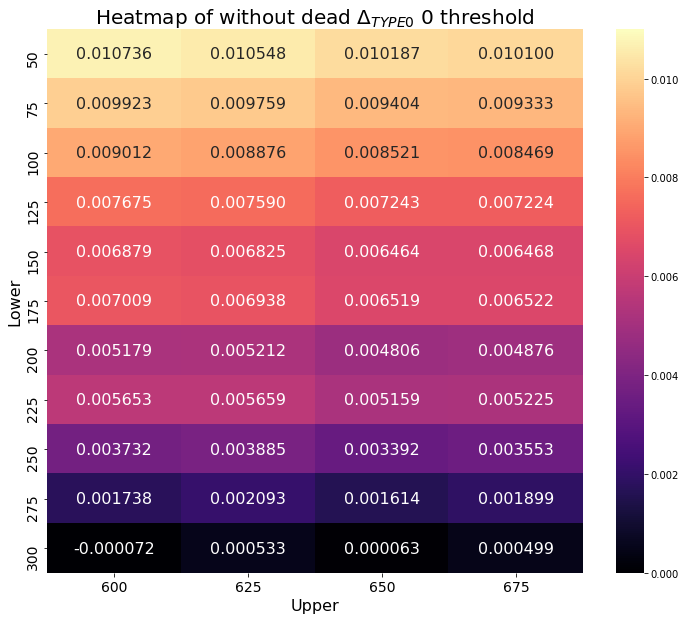

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'withoutdead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $\Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_0.png')
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_0.eps')

# Show the plot
plt.show()


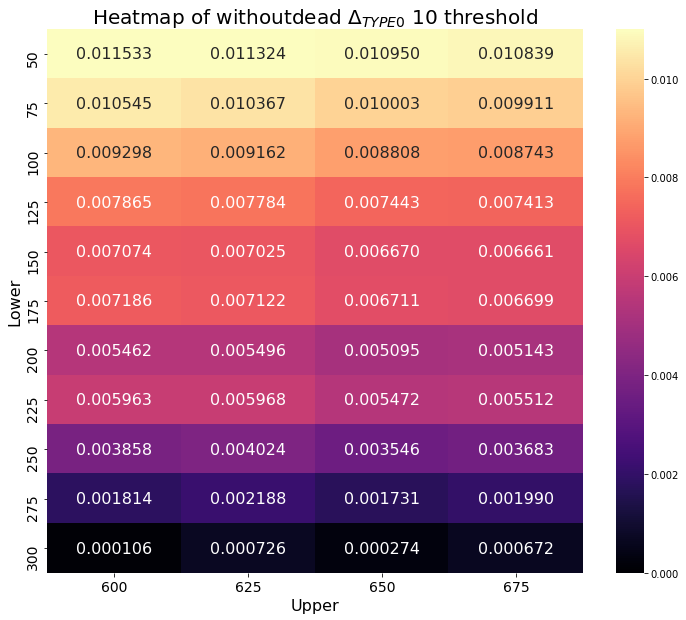

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'withoutdead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16},vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of withoutdead $\Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_10.png')
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_10.eps')

# Show the plot
plt.show()


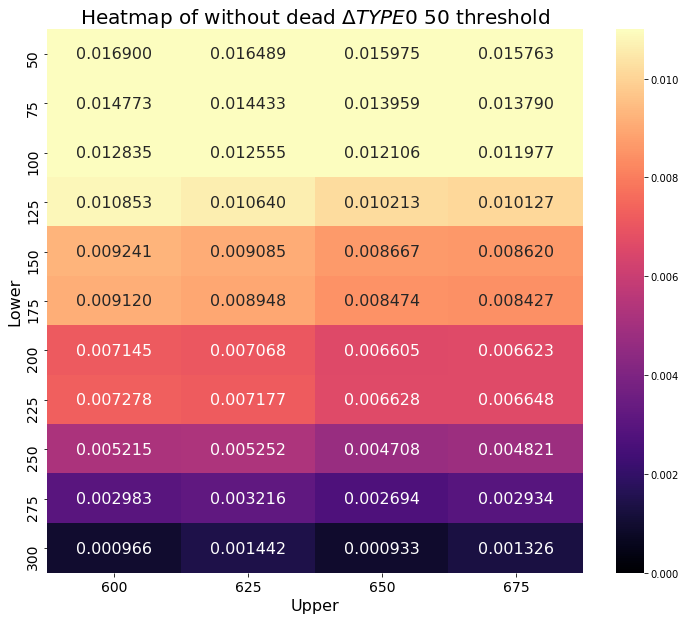

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'withoutdead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $\Delta{TYPE 0}$ 50 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_50.png')
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_50.eps')

# Show the plot
plt.show()


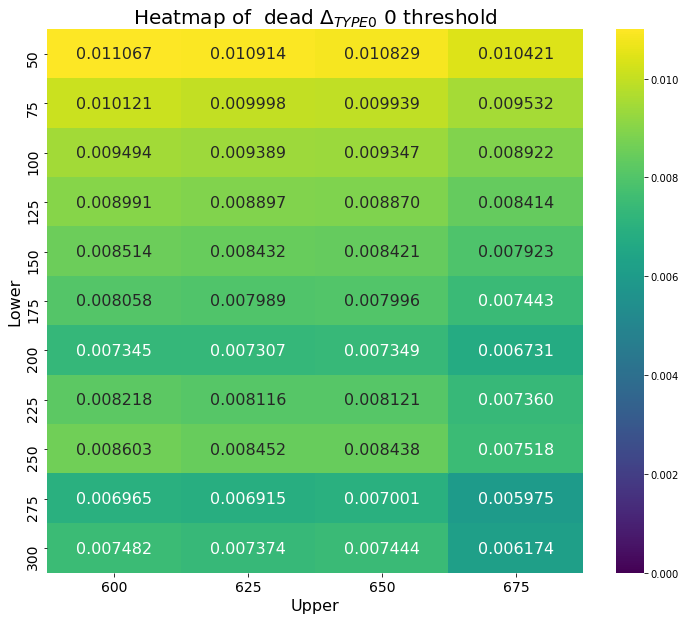

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresoldead_0.png')
plt.savefig('../visualisation/HeatmapCorrectionsType0Thresoldead_0.eps')

# Show the plot
plt.show()


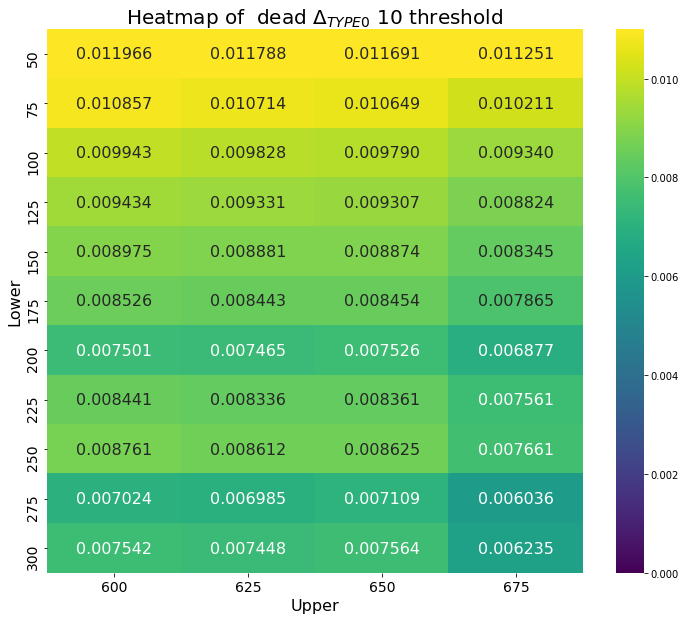

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'dead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_0.png')
plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_0.eps')

# Show the plot
plt.show()


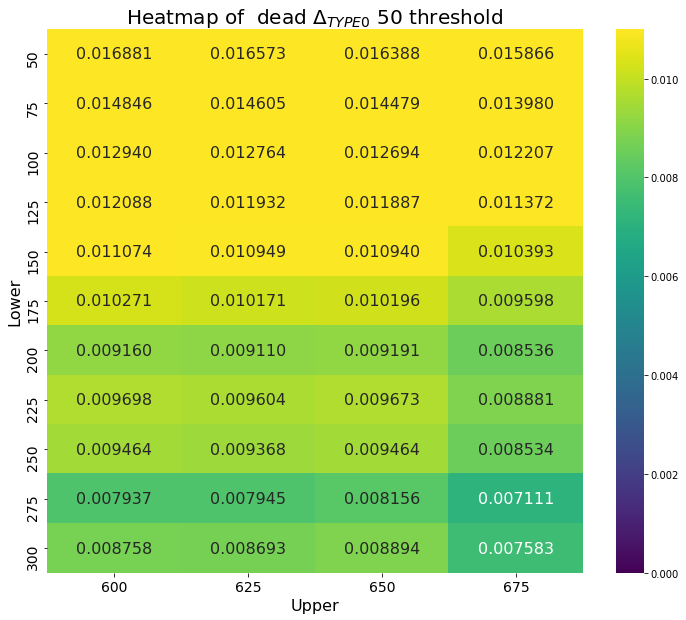

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\Delta_{TYPE 0}$ 50 threshold', fontsize = 20)
plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_50.png')
plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_50.eps')

# Show the plot
plt.show()


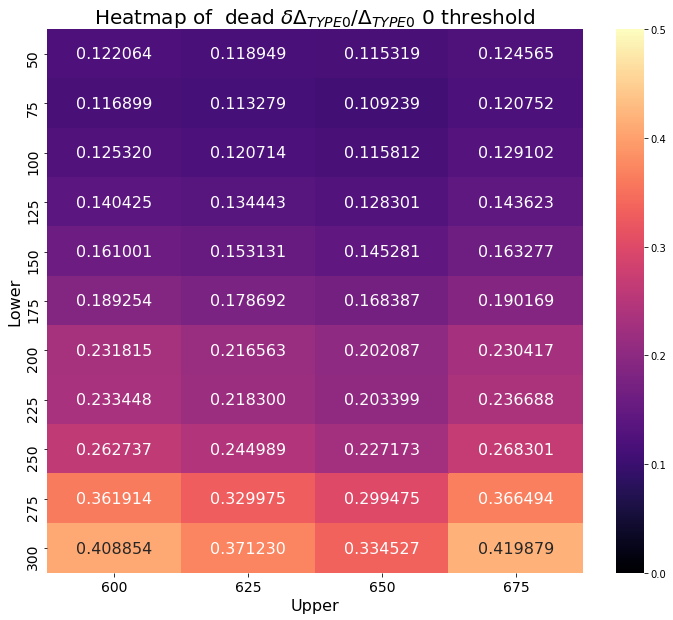

In [139]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
plt.savefig('../visualisation/err_dead_correction_misbs_0.png')
plt.savefig('../visualisation/err_dead_correction_misbs_0.eps')

# Show the plot
plt.show()


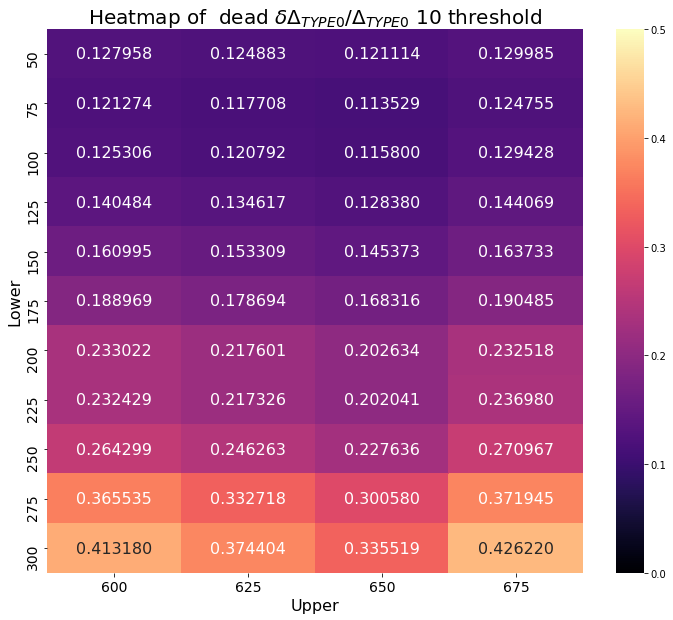

In [134]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
plt.savefig('../visualisation/err_dead_correction_misbs_10.png')
plt.savefig('../visualisation/err_dead_correction_misbs_10.eps')

# Show the plot
plt.show()


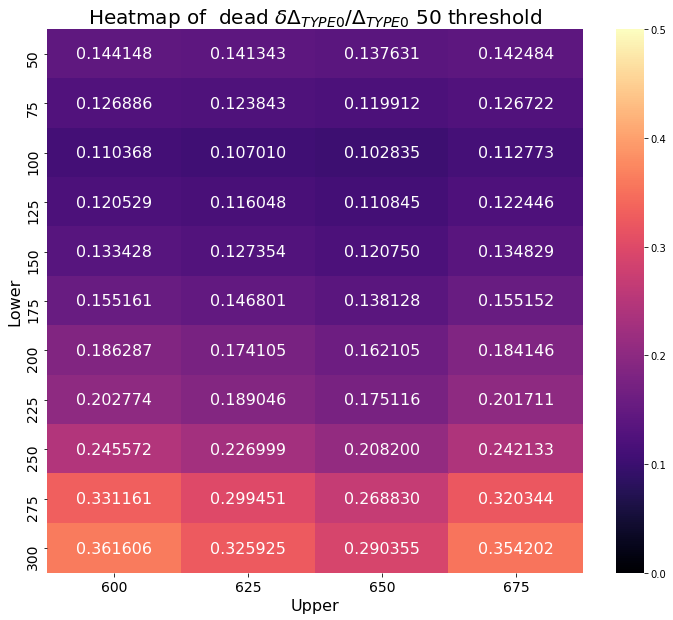

In [135]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 50 threshold', fontsize = 20)
plt.savefig('../visualisation/err_dead_correction_misbs_50.png')
plt.savefig('../visualisation/err_dead_correction_misbs_50.eps')

# Show the plot
plt.show()


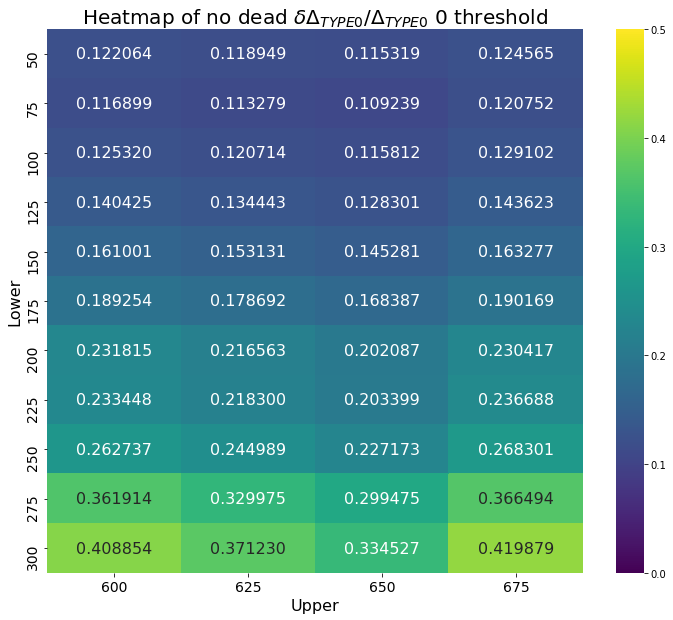

In [138]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of no dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
plt.savefig('../visualisation/err_withoutdead_correction_misbs_0.png')
plt.savefig('../visualisation/err_withoutdead_correction_misbs_0.eps')

# Show the plot
plt.show()


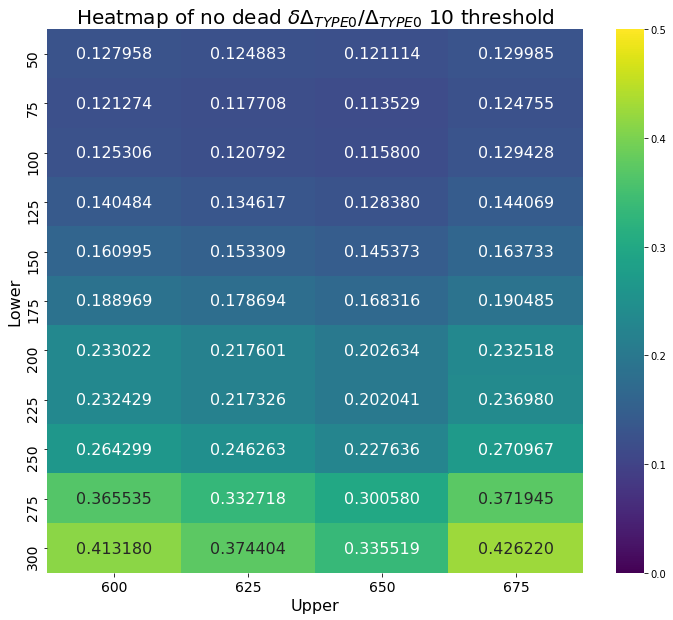

In [140]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of no dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
plt.savefig('../visualisation/err_withoutdead_correction_misbs_10.png')
plt.savefig('../visualisation/err_withoutdead_correction_misbs_10.eps')

# Show the plot
plt.show()


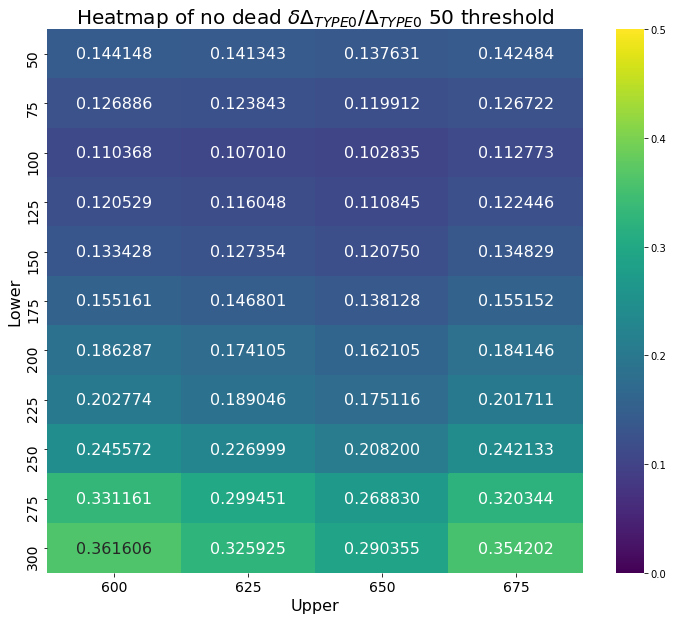

In [141]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of no dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 50 threshold', fontsize = 20)
plt.savefig('../visualisation/err_withoutdead_correction_misbs_50.png')
plt.savefig('../visualisation/err_withoutdead_correction_misbs_50.eps')

# Show the plot
plt.show()
